# residual life expectancy

In [1]:
from pathlib import Path
from pprint import pprint
import yaml

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [18, 6]
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.grid.which'] = 'both'

path_data = Path("../data/demographycs")
#path_results = Path("../analysis_results/united_kingdom")

pprint(list(path_data.iterdir()))

[PosixPath('../data/demographycs/.~lock.population_by_country_2020.csv#'),
 PosixPath('../data/demographycs/uk.csv'),
 PosixPath('../data/demographycs/france.csv'),
 PosixPath('../data/demographycs/population_by_country_2020.csv'),
 PosixPath('../data/demographycs/israel.csv'),
 PosixPath('../data/demographycs/us.csv'),
 PosixPath('../data/demographycs/GDP.csv'),
 PosixPath('../data/demographycs/spain.csv'),
 PosixPath('../data/demographycs/italy.csv')]


In [3]:
from pandas_utils import extract_interval_end_from_text, text_interval_index_to_interval_index, reduce_histogram_resolution

## residual life expectancy over time

In [4]:
def get_demographycs(country, indicator, is_remove_newborns=True):
    df_0 = pd.read_csv(path_data.joinpath(f'{country}.csv'), index_col=[0,1], header=[0, 1], skiprows=[2,], )
    df_0.index.names = ['indicator', 'age_group']
    df_0.columns.names = ['year', 'sex']
    index = df_0.index.to_frame(index=False)
    index.age_group = index.age_group.str.replace(' years', '').str.replace('<1 year', '0-0').str.replace('+', '-120').astype(str)
    #index.age_group = text_interval_index_to_interval_index(index.age_group.values, closed='both')
    df_0.index = pd.MultiIndex.from_frame(index)
    df_0.sort_index(axis=1, inplace=True)
    if is_remove_newborns:
        df_0 = df_0.loc[(index.age_group != '0-0').values]

    dfs = df_0.swaplevel('year', 'sex', axis=1)
    df = (dfs['Male'] + dfs['Female']) / 2

    demographycs = df.swapaxes(0, 1)
    demographycs.index = pd.to_numeric(demographycs.index)
    res = demographycs[indicator]
    res.columns = text_interval_index_to_interval_index(res.columns, closed='both')
    res.columns.name = 'age_group'
    return res

indicators = {'residual' : 'ex - expectation of life at age x',
              'death_rate' : 'nMx - age-specific death rate between ages x and x+n',
              'p_dying' : 'nqx - probability of dying between ages x and x+n',

             }

demo = get_demographycs('uk', indicators['residual'], is_remove_newborns=False)

In [28]:
demo

age_group  [0, 0]  [1, 4]  [5, 9]  [10, 14]  [15, 19]  [20, 24]  [25, 29]  \
year                                                                        
2000        77.85   77.25   73.35     68.40     63.45     58.60     53.70   
2001        78.15   77.55   73.60     68.65     63.70     58.85     54.00   
2002        78.25   77.70   73.75     68.80     63.85     58.95     54.15   
2003        78.40   77.80   73.90     68.90     63.95     59.05     54.25   
2004        78.90   78.30   74.40     69.40     64.45     59.55     54.70   
2005        79.05   78.45   74.55     69.60     64.60     59.75     54.90   
2006        79.45   78.85   74.95     69.95     65.00     60.10     55.25   
2007        79.70   79.10   75.15     70.20     65.25     60.35     55.45   
2008        79.85   79.20   75.30     70.35     65.40     60.45     55.60   
2009        80.35   79.75   75.80     70.85     65.90     61.00     56.10   
2010        80.55   79.90   75.95     71.00     66.05     61.10     56.25   
2011        81.00   80.35   76.40     71.45     66.45     61.55     56.70   
2012        81.10   80.45   76.45     71.50     66.55     61.60     56.70   
2013        81.15   80.50   76.50     71.60     66.60     61.70     56.75   
2014        81.35   80.70   76.75     71.80     66.80     61.90     57.05   
2015        81.10   80.40   76.45     71.45     66.55     61.60     56.70   
2016        81.45   80.70   76.75     71.80     66.80     61.90     57.00   

age_group  [30, 34]  [35, 39]  [40, 44]  [45, 49]  [50, 54]  [55, 59]  \
year                                                                    
2000          48.85     44.10     39.25     34.60     30.05     25.55   
2001          49.15     44.35     39.60     34.85     30.30     25.85   
2002          49.30     44.45     39.70     35.00     30.45     25.95   
2003          49.40     44.55     39.80     35.10     30.50     26.10   
2004          49.90     45.05     40.30     35.55     31.00     26.50   
2005          50.05     45.20     40.45     35.70     31.10     26.65   
2006          50.40     45.60     40.80     36.10     31.50     27.05   
2007          50.60     45.80     41.05     36.30     31.70     27.25   
2008          50.75     45.95     41.20     36.45     31.85     27.40   
2009          51.25     46.40     41.65     36.95     32.30     27.85   
2010          51.40     46.55     41.80     37.05     32.45     27.90   
2011          51.75     46.95     42.15     37.45     32.85     28.30   
2012          51.85     47.00     42.15     37.50     32.85     28.30   
2013          51.90     47.05     42.30     37.55     32.90     28.40   
2014          52.10     47.30     42.50     37.75     33.15     28.60   
2015          51.85     47.00     42.15     37.50     32.85     28.30   
2016          52.15     47.30     42.45     37.75     33.10     28.55   

age_group  [60, 64]  [65, 69]  [70, 74]  [75, 79]  [80, 84]  [85, 120]  
year                                                                    
2000          21.35     17.35     13.75     10.50      7.85       5.65  
2001          21.60     17.60     13.95     10.75      8.00       5.75  
2002          21.75     17.70     14.05     10.80      8.05       5.80  
2003          21.80     17.80     14.10     10.85      8.00       5.75  
2004          22.20     18.20     14.50     11.20      8.35       6.00  
2005          22.35     18.30     14.50     11.15      8.25       5.90  
2006          22.75     18.70     14.90     11.45      8.55       6.10  
2007          22.95     18.90     15.10     11.60      8.65       6.20  
2008          23.10     19.00     15.15     11.70      8.70       6.20  
2009          23.55     19.40     15.55     12.05      8.95       6.40  
2010          23.60     19.45     15.60     12.05      8.95       6.35  
2011          23.95     19.85     15.95     12.35      9.20       6.55  
2012          23.95     19.75     15.90     12.30      9.10       6.50  
2013          24.00     19.85     15.95     12.35    

In [29]:
newborns = demo[pd.Interval(0, 0, 'both')].rename()
middle_age = demo[pd.Interval(40, 44, 'both')].rename()

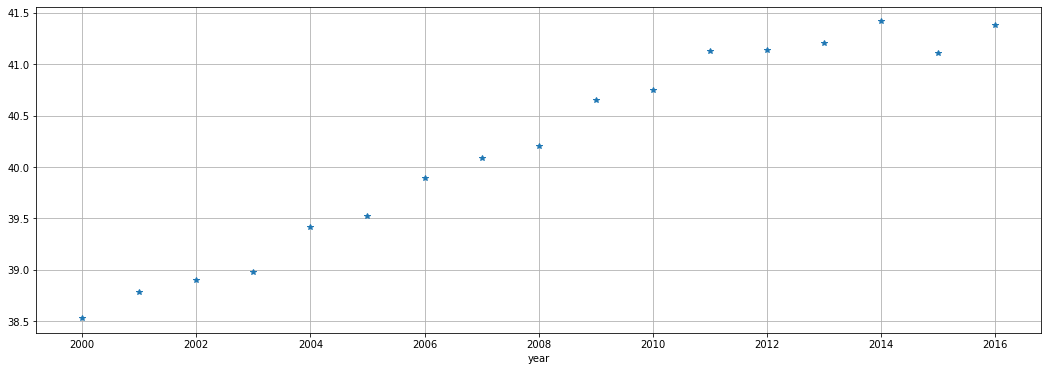

In [14]:
demo.mean(axis=1).plot(linestyle='', marker='*')

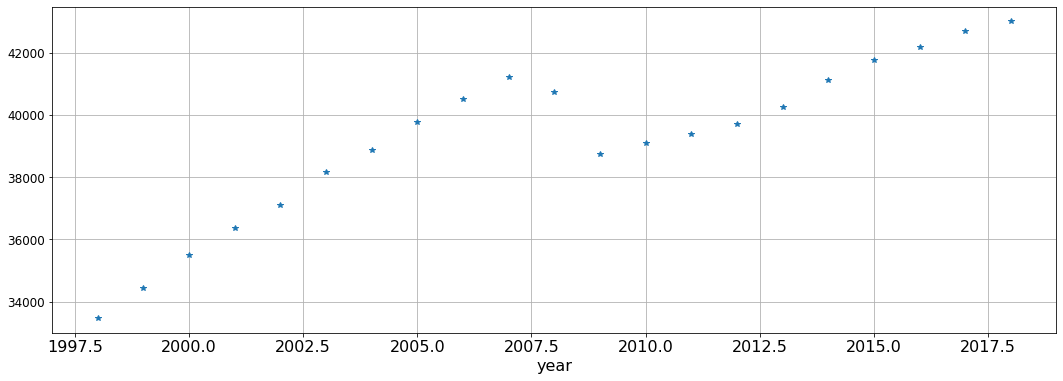

In [31]:
gdp = pd.read_csv(path_data.joinpath('GDP.csv'), index_col=0, header=[1, 2], skiprows=0)
gdp.index.name = 'year'
#gdp.columns.names = ['measure', 'country']
ax = gdp['nominal']['uk'].plot(linestyle='', marker='*')


0.8568521042457249
GDP loss: 82 [Billions NIS]
COVID_19 mortality: 21600
[1735363.6363636365, 1542333.7876423048, 585714.2857142857, 375000]
GDP\ndecline\nas US                 1.735364e+06
GDP\ndecline\nas UK                 1.542334e+06
statistical\nvalue of life\nyear    5.857143e+05
COVID-19                            3.750000e+05
dtype: float64


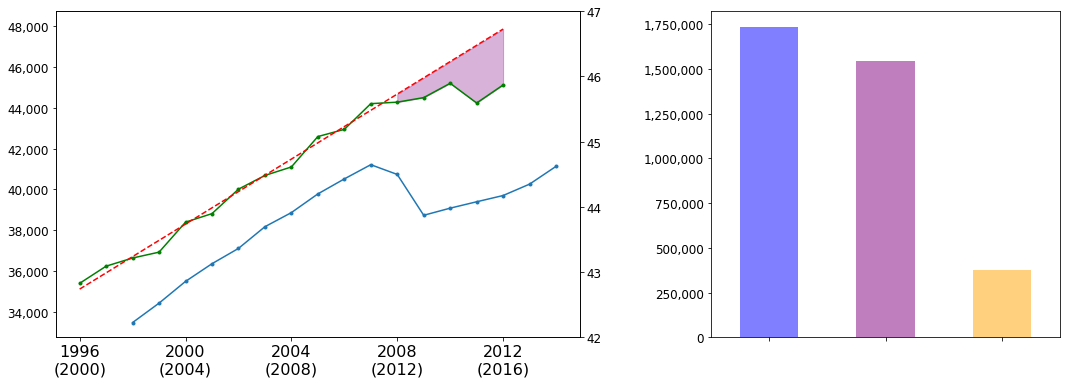

In [226]:

matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['axes.titlesize'] = 14
matplotlib.rcParams['font.size'] = 14




fig, (ax, ax_r) = plt.subplots(1, 2, gridspec_kw={'width_ratios':[60,40], 'wspace':0.3})

spending = gdp['nominal']['uk'].shift(4).dropna()

spending_early = spending.loc[:2008]
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(spending_early.index.values.reshape(-1, 1), spending_early.values.reshape(-1, 1))  # perform linear regression
#Y_pred = linear_regressor.predict(X)  # make predictions
spending.plot(ax=ax, label='GDP per Capita', linestyle='-', marker=".")
if True: ax.plot(spending.index, linear_regressor.predict(spending.index.values.reshape(-1, 1)), linestyle='--', alpha=0)
ax.set_ylabel('GDP per Capita [USD 2010]', color='blue')

ax2 = ax.twinx()

#res = demo.mean(axis=1)
res = pd.Series(index=demo.index, data=np.average(demo, axis=1, weights=w))
res_early = res.loc[:2011]

linear_regressor2 = LinearRegression()  # create object for the class
linear_regressor2.fit(res_early.index.values.reshape(-1, 1), res_early.values.reshape(-1, 1))  # perform linear regression
#Y_pred = linear_regressor.predict(X)  # make predictions
res.plot(ax=ax2, c='green', label='Residual Life Expectancy', linestyle='-', marker='.')
ax2.plot(res.index, linear_regressor2.predict(res.index.values.reshape(-1, 1)), c='red', linestyle='--')
#ax2.set_ylim((38.5, 41.5))
ax.legend(loc='best')
ax2.legend(loc='upper center')
ax2.set_ylabel('Life Years', color='green')

ax.set_title('UK: GDP per Capita decline (2008) affecting Residual Life Expectancy 2012 onward')

fig = ax.get_figure()
#fig.savefig(path_results.joinpath('uk_spending_residual_extrapolation.jpeg'))

ax2.fill_between([2012, 2013, 2014, 2015, 2016], res.loc[2012: 2016].values, linear_regressor2.predict(np.array([2012, 2013, 2014, 2015, 2016]).reshape(-1, 1)).reshape(-1), color='purple', alpha=0.3)
delta = (linear_regressor2.predict(np.array([2012, 2013, 2014, 2015, 2016]).reshape(-1, 1)).reshape(-1) - res.loc[2012: 2016].values)[-1]
print(delta)
if False: ax2.text(2014.5, 46, 'Life Lost', fontsize=14)

ax.grid(False)
ax2.grid(False)

ax2.set_yticks(np.arange(42, 48))
ax2.set_yticklabels(np.arange(42, 48))
ax.set_xticks(np.arange(2000, 2018, 4))
labels = [f'{year}\n({year+4})' for year in np.arange(2000, 2018, 4) - 4]
_ = ax.set_xticklabels(labels)
ax.set_xlabel('Top: Year GDP, Bottom: Year Life Expectancy', fontsize=14)


params_string = f'GDP loss: {82} [Billions NIS]\nCOVID_19 mortality: {21600}'
print(params_string)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

matplotlib.rcParams['axes.formatter.limits'] = (-5, 8)
unceirtainty_factor_uk = 0.2
us_gdp_fix_factor = 6 / 4.4
uncertainty_factor_us = 0.14
GDP_loss = 82 * 10 ** 9
VSL_year = 140 * 10 ** 3
life_years_loss_bars = [us_gdp_fix_factor * uncertainty_factor_us * 1.01 * 9 * 10 ** 6, unceirtainty_factor_uk * delta * 9 * 10 ** 6, GDP_loss / VSL_year,375000]
print(life_years_loss_bars)
lost_life = pd.Series(index=['GDP\ndecline\nas US', 'GDP\ndecline\nas UK', 'statistical\nvalue of life\nyear','COVID-19'], data=life_years_loss_bars)
print(lost_life)
lost_life.loc[['GDP\ndecline\nas US', 'GDP\ndecline\nas UK','COVID-19']].plot.bar(ax=ax_r, rot=0, color=['blue', 'purple', 'orange'], alpha=0.5)
if False: ax_r.text(0.4, 0.95, params_string, transform=ax_r.transAxes, fontsize=10, verticalalignment='top', bbox=props)
ax_r.set_title('Israel: expected GDP related life years loss ')
#fig.suptitle('')
ax_r.grid(False)

ax_r.set_title('')
ax_r.set_xticklabels('')
ax.set_title('')
ax.set_ylabel('')
ax2.set_ylabel('')
ax.set_xlabel('')
ax.get_legend().remove()
ax2.get_legend().remove()
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax_r.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

### the same for specific group age

0.8154428904428954
GDP loss: 82 [Billions NIS]
COVID_19 mortality: 21600
[1735363.6363636365, 1467797.202797212, 585714.2857142857, 375000]
GDP\ndecline\nas US                 1.735364e+06
GDP\ndecline\nas UK                 1.467797e+06
statistical\nvalue of life\nyear    5.857143e+05
COVID-19                            3.750000e+05
dtype: float64


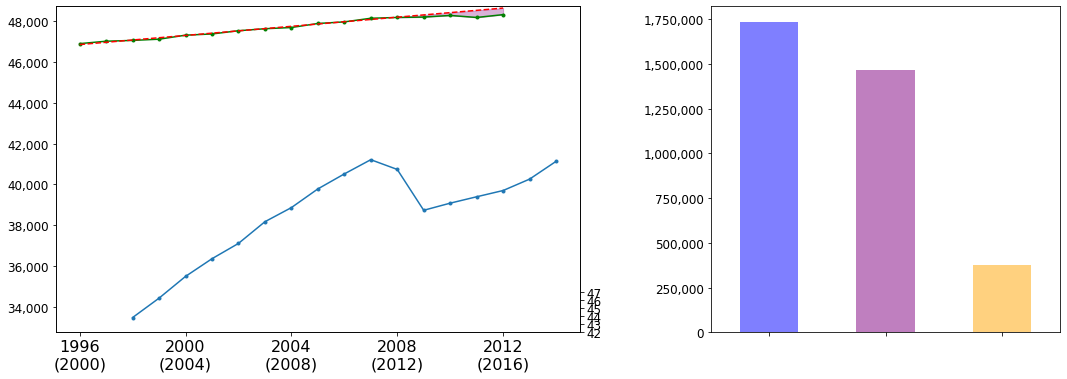

In [32]:

matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['axes.titlesize'] = 14
matplotlib.rcParams['font.size'] = 14




fig, (ax, ax_r) = plt.subplots(1, 2, gridspec_kw={'width_ratios':[60,40], 'wspace':0.3})

spending = gdp['nominal']['uk'].shift(4).dropna()

spending_early = spending.loc[:2008]
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(spending_early.index.values.reshape(-1, 1), spending_early.values.reshape(-1, 1))  # perform linear regression
#Y_pred = linear_regressor.predict(X)  # make predictions
spending.plot(ax=ax, label='GDP per Capita', linestyle='-', marker=".")
if True: ax.plot(spending.index, linear_regressor.predict(spending.index.values.reshape(-1, 1)), linestyle='--', alpha=0)
ax.set_ylabel('GDP per Capita [USD 2010]', color='blue')

ax2 = ax.twinx()

#res = demo.mean(axis=1)
res = newborns
res_early = res.loc[:2011]

linear_regressor2 = LinearRegression()  # create object for the class
linear_regressor2.fit(res_early.index.values.reshape(-1, 1), res_early.values.reshape(-1, 1))  # perform linear regression
#Y_pred = linear_regressor.predict(X)  # make predictions
res.plot(ax=ax2, c='green', label='Residual Life Expectancy', linestyle='-', marker='.')
ax2.plot(res.index, linear_regressor2.predict(res.index.values.reshape(-1, 1)), c='red', linestyle='--')
#ax2.set_ylim((38.5, 41.5))
ax.legend(loc='best')
ax2.legend(loc='upper center')
ax2.set_ylabel('Life Years', color='green')

ax.set_title('UK: GDP per Capita decline (2008) affecting Residual Life Expectancy 2012 onward')

fig = ax.get_figure()
#fig.savefig(path_results.joinpath('uk_spending_residual_extrapolation.jpeg'))

ax2.fill_between([2012, 2013, 2014, 2015, 2016], res.loc[2012: 2016].values, linear_regressor2.predict(np.array([2012, 2013, 2014, 2015, 2016]).reshape(-1, 1)).reshape(-1), color='purple', alpha=0.3)
delta = (linear_regressor2.predict(np.array([2012, 2013, 2014, 2015, 2016]).reshape(-1, 1)).reshape(-1) - res.loc[2012: 2016].values)[-1]
print(delta)
if False: ax2.text(2014.5, 46, 'Life Lost', fontsize=14)

ax.grid(False)
ax2.grid(False)

ax2.set_yticks(np.arange(42, 48))
ax2.set_yticklabels(np.arange(42, 48))
ax.set_xticks(np.arange(2000, 2018, 4))
labels = [f'{year}\n({year+4})' for year in np.arange(2000, 2018, 4) - 4]
_ = ax.set_xticklabels(labels)
ax.set_xlabel('Top: Year GDP, Bottom: Year Life Expectancy', fontsize=14)


params_string = f'GDP loss: {82} [Billions NIS]\nCOVID_19 mortality: {21600}'
print(params_string)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

matplotlib.rcParams['axes.formatter.limits'] = (-5, 8)
unceirtainty_factor_uk = 0.2
us_gdp_fix_factor = 6 / 4.4
uncertainty_factor_us = 0.14
GDP_loss = 82 * 10 ** 9
VSL_year = 140 * 10 ** 3
life_years_loss_bars = [us_gdp_fix_factor * uncertainty_factor_us * 1.01 * 9 * 10 ** 6, unceirtainty_factor_uk * delta * 9 * 10 ** 6, GDP_loss / VSL_year,375000]
print(life_years_loss_bars)
lost_life = pd.Series(index=['GDP\ndecline\nas US', 'GDP\ndecline\nas UK', 'statistical\nvalue of life\nyear','COVID-19'], data=life_years_loss_bars)
print(lost_life)
lost_life.loc[['GDP\ndecline\nas US', 'GDP\ndecline\nas UK','COVID-19']].plot.bar(ax=ax_r, rot=0, color=['blue', 'purple', 'orange'], alpha=0.5)
if False: ax_r.text(0.4, 0.95, params_string, transform=ax_r.transAxes, fontsize=10, verticalalignment='top', bbox=props)
ax_r.set_title('Israel: expected GDP related life years loss ')
#fig.suptitle('')
ax_r.grid(False)

ax_r.set_title('')
ax_r.set_xticklabels('')
ax.set_title('')
ax.set_ylabel('')
ax2.set_ylabel('')
ax.set_xlabel('')
ax.get_legend().remove()
ax2.get_legend().remove()
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax_r.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

[0.81544289]


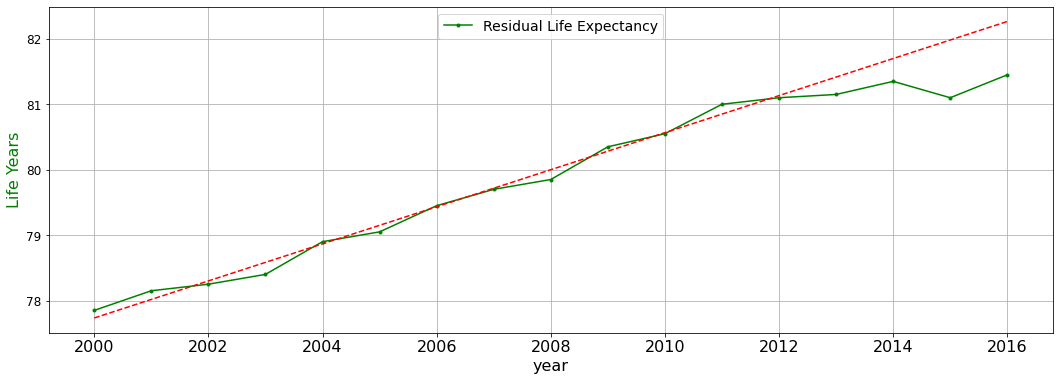

In [34]:
fig, ax2 = plt.subplots()
linear_regressor2 = LinearRegression()  # create object for the class
linear_regressor2.fit(res_early.index.values.reshape(-1, 1), res_early.values.reshape(-1, 1))  # perform linear regression
#Y_pred = linear_regressor.predict(X)  # make predictions
res.plot(ax=ax2, c='green', label='Residual Life Expectancy', linestyle='-', marker='.')
ax2.plot(res.index, linear_regressor2.predict(res.index.values.reshape(-1, 1)), c='red', linestyle='--')
#ax2.set_ylim((38.5, 41.5))
ax.legend(loc='best')
ax2.legend(loc='upper center')
ax2.set_ylabel('Life Years', color='green')

print(linear_regressor2.predict(res.index.values.reshape(-1, 1))[-1] - res.values[-1])

In [201]:
np.round(lost_life, -3)

GDP\ndecline\nas US                 1735000.0
GDP\ndecline\nas UK                 1542000.0
statistical\nvalue of life\nyear     586000.0
COVID-19                             375000.0
dtype: float64

In [120]:
spending

year
2002    33470.9
2003    34423.6
2004    35490.2
2005    36358.3
2006    37108.3
2007    38173.3
2008    38865.5
2009    39782.0
2010    40518.0
2011    41216.1
2012    40738.0
2013    38734.2
2014    39083.8
2015    39397.1
2016    39703.7
2017    40262.7
2018    41134.4
Name: uk, dtype: float64

In [121]:
25/400

0.0625

## just res

In [9]:
from sklearn.linear_model import LinearRegression

[0.94749417]


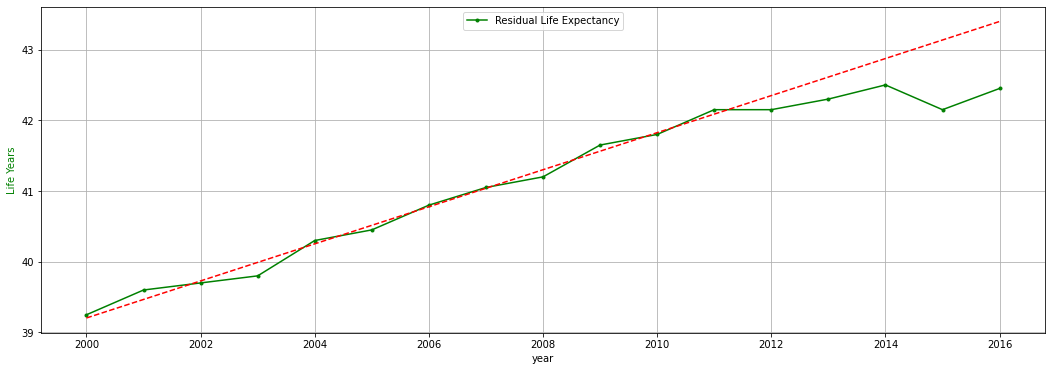

In [30]:
fig, ax2 = plt.subplots()



us_demo = get_demographycs('uk', indicators['residual'], is_remove_newborns=False)
#newborns = demo[pd.Interval(0, 0, 'both')].rename()
#middle_age = demo[pd.Interval(40, 44, 'both')].rename()

turning_year = 2011

#res = us_demo.mean(axis=1)
#res = us_demo[pd.Interval(0, 0, 'both')].rename()
res = us_demo[pd.Interval(40, 44, 'both')].rename()

res_early = res.loc[:turning_year]


linear_regressor2 = LinearRegression()  # create object for the class
linear_regressor2.fit(res_early.index.values.reshape(-1, 1), res_early.values.reshape(-1, 1))  # perform linear regression
#Y_pred = linear_regressor.predict(X)  # make predictions
res.plot(ax=ax2, c='green', label='Residual Life Expectancy', linestyle='-', marker='.')
ax2.plot(res.index, linear_regressor2.predict(res.index.values.reshape(-1, 1)), c='red', linestyle='--')
#ax2.set_ylim((38.5, 41.5))
ax2.legend(loc='best')
ax2.legend(loc='upper center')
ax2.set_ylabel('Life Years', color='green')


print(linear_regressor2.predict(res.index.values.reshape(-1, 1))[-1] - res.values[-1])

1.3103146853146839 0.30000000000000426 1.0103146853146796


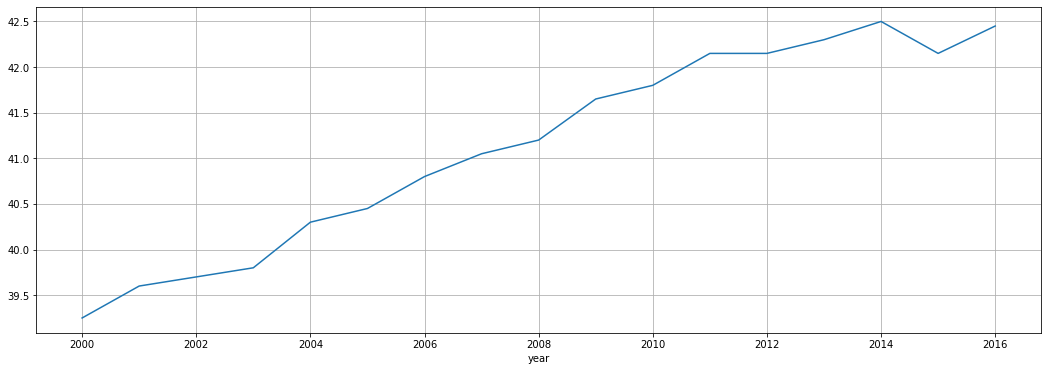

In [40]:
#res2 = us_demo[pd.Interval(0, 0, 'both')].rename()
res2 = us_demo[pd.Interval(40, 44, 'both')].rename()

#res2.plot()

expected_improvement = (res2.index[-1] - turning_year) * linear_regressor2.coef_[0][0]
actual_improvement = (res2.values[-1] - res2[turning_year])
loss = expected_improvement - actual_improvement
print(expected_improvement, actual_improvement, loss)

#linear_regressor2.coef_, linear_regressor2.intercept_

## comparing life expectancy

In [47]:
print(pd.Series(index=['newborns', 'age 40'], data = [0.81544289, 0.94749417]) / 5 * 12/1)

print(pd.Series(index=['newborns', 'age 40'], data = [1.3030303, 1.03848485]) * 6 / 4.4 / 7 * 12/1)

newborns    1.957063
age 40      2.273986
dtype: float64
newborns    3.046045
age 40      2.427627
dtype: float64


In [48]:
# corona lost life years devided by all population
3.75e5 / 9e6 * 12/1

0.5

##  3 from last time dont touch

[1.11900673]


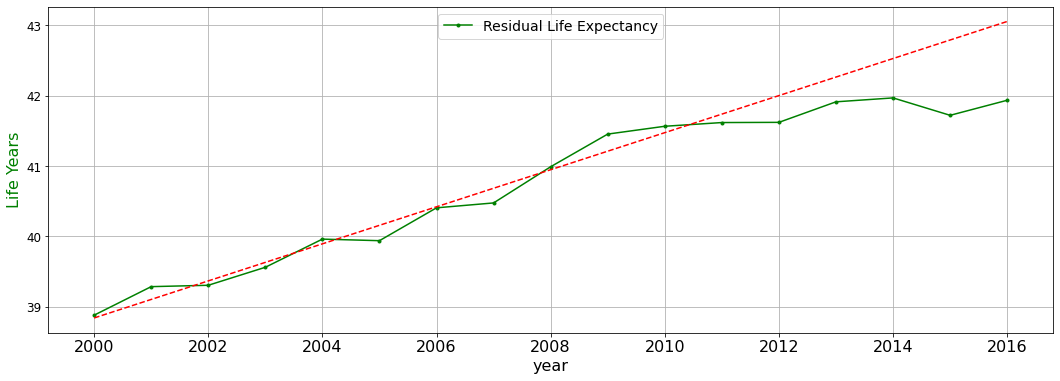

In [221]:
fig, ax2 = plt.subplots()

us_demo = get_demographycs('israel', indicators['residual'])


res = us_demo.mean(axis=1)
res_early = res.loc[:2009]


linear_regressor2 = LinearRegression()  # create object for the class
linear_regressor2.fit(res_early.index.values.reshape(-1, 1), res_early.values.reshape(-1, 1))  # perform linear regression
#Y_pred = linear_regressor.predict(X)  # make predictions
res.plot(ax=ax2, c='green', label='Residual Life Expectancy', linestyle='-', marker='.')
ax2.plot(res.index, linear_regressor2.predict(res.index.values.reshape(-1, 1)), c='red', linestyle='--')
#ax2.set_ylim((38.5, 41.5))
ax.legend(loc='best')
ax2.legend(loc='upper center')
ax2.set_ylabel('Life Years', color='green')


print(linear_regressor2.predict(res.index.values.reshape(-1, 1))[-1] - res.values[-1])

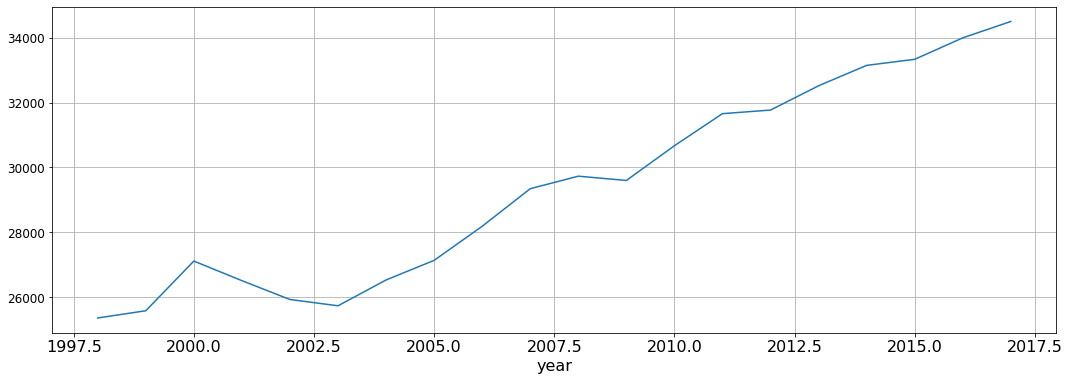

In [222]:
aa = gdp.nominal.israel
aa.plot()

In [211]:
(33500 / 27000) ** (1/15)

1.0144844693798762

In [213]:
29600 / 29700

0.9966329966329966

In [187]:
2200 / 50000

0.044

In [86]:
res.loc[2012:2016]

year
2012    41.133333
2013    41.202778
2014    41.413889
2015    41.111111
2016    41.377778
dtype: float64

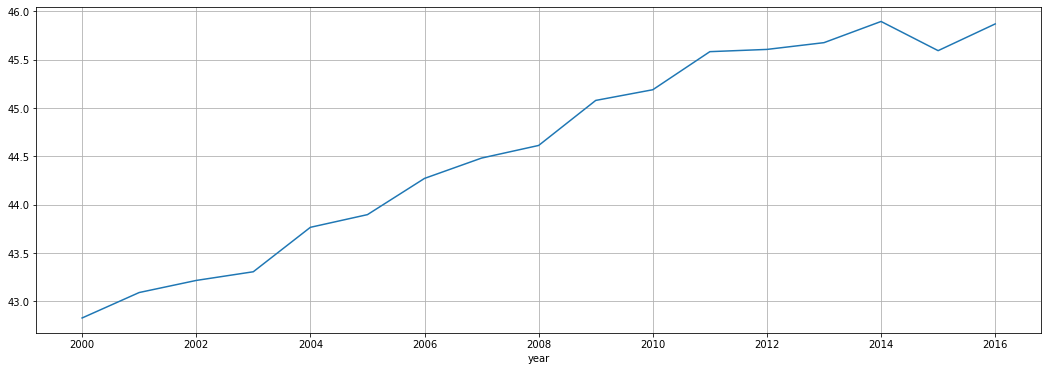

In [106]:
pd.Series(index=demo.index, data=np.average(demo, axis=1, weights=w)).plot()

In [103]:
w = [4094014, 
3614258,
3617467,
3961911,
4318698,
4434160,
4264636,
4178803,
4508404,
4716340,
4311356,
3708633,
3758636,
3297826,
2559145,
2090680,
1582785,
981793,
]


In [48]:
ax.get_xticklabels()[0]

Text(1997.5, 0, '1997.5')

In [59]:
ax2.set_yticks(np.arange(39, 42))
ax2.set_yticklabels(np.arange(39, 42))

[Text(1, 38.0, '39'), Text(1, 38.5, '40'), Text(1, 39.0, '41')]

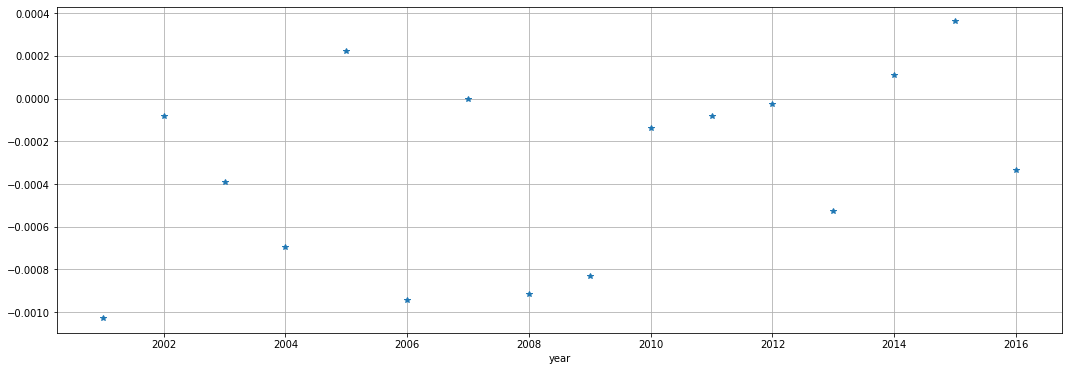

In [99]:
demo.rename(columns=lambda s : str(s)).diff().mean(axis=1).plot(linestyle='', marker='*')

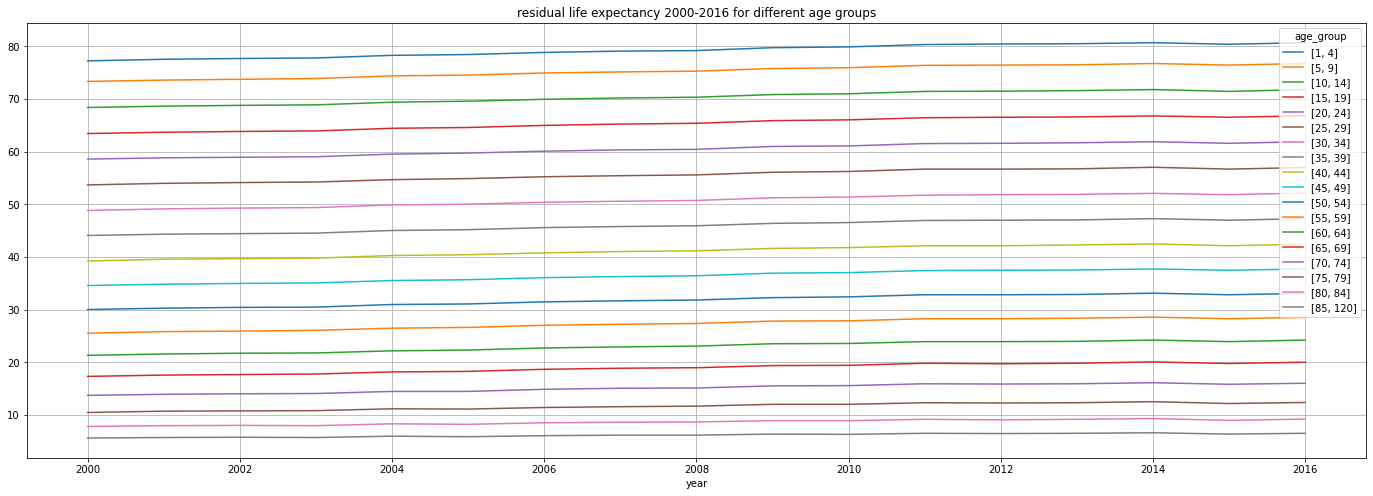

In [8]:
residual_life_expectancy.rename(columns=lambda x:  str(x)).plot(grid=True, figsize=(24, 8), title='residual life expectancy 2000-2016 for different age groups')

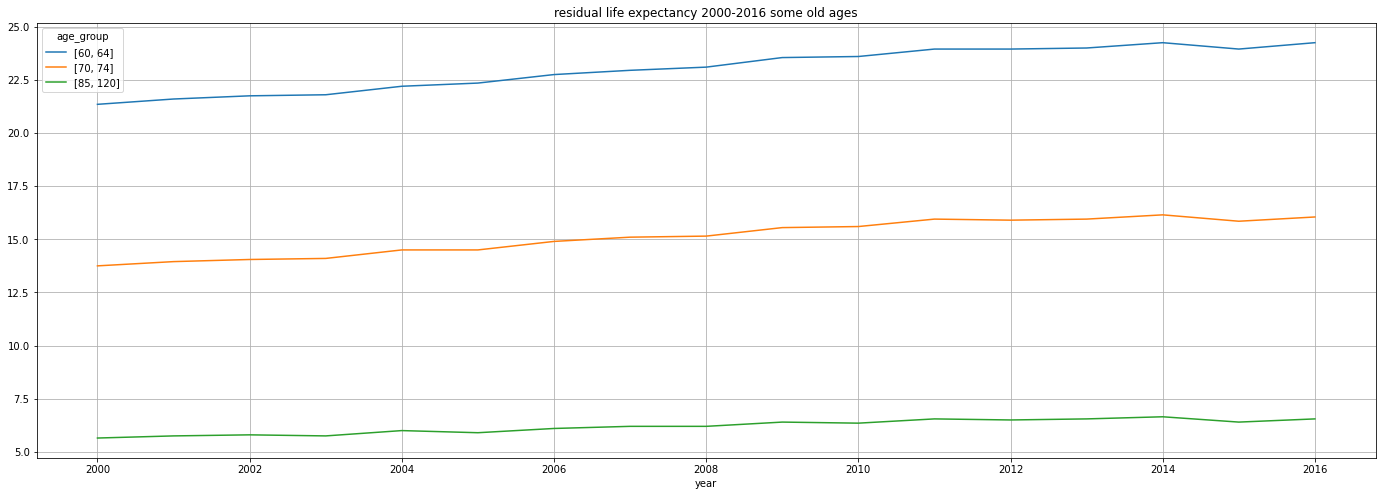

In [9]:
residual_life_expectancy.rename(columns=lambda x : str(x)).loc[:, ['[60, 64]', '[70, 74]', '[85, 120]']].plot(grid=True, title='residual life expectancy 2000-2016 some old ages', figsize=(24, 8))

In [10]:
residual_life_expectancy_diff = residual_life_expectancy.diff(axis=0)

Text(0, 0.5, 'delta[years]')

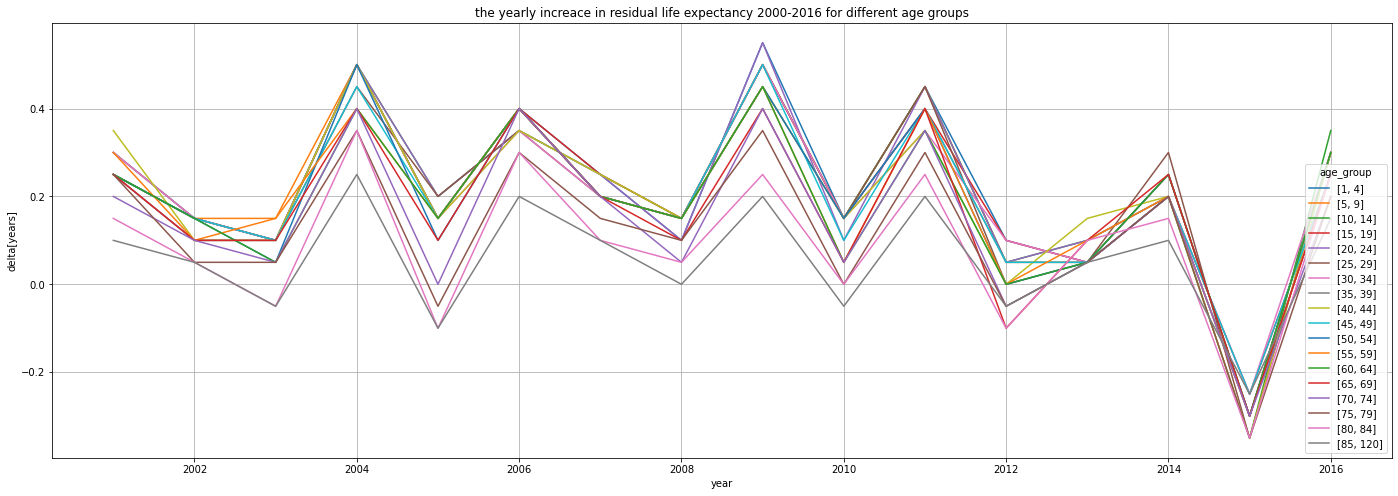

In [11]:
ax = residual_life_expectancy_diff.rename(columns=lambda x:  str(x)).plot(grid=True, figsize=(24, 8), title='the yearly increace in residual life expectancy 2000-2016 for different age groups')
ax.set_ylabel('delta[years]')

### checking consistency of yearly increase

In [12]:
residual_life_expectancy_diff.describe().loc[['mean', 'std'], :]

age_group    [1, 4]    [5, 9]  [10, 14]  [15, 19]  [20, 24]  [25, 29]  \
mean       0.215625  0.212500  0.212500  0.209375  0.206250  0.206250   
std        0.207138  0.200416  0.206962  0.186386  0.205649  0.208066   

age_group  [30, 34]  [35, 39]  [40, 44]  [45, 49]  [50, 54]  [55, 59]  \
mean        0.20625  0.200000  0.200000  0.196875  0.190625  0.187500   
std         0.18246  0.194936  0.200832  0.184814  0.198510  0.188414   

age_group  [60, 64]  [65, 69]  [70, 74]  [75, 79]  [80, 84]  [85, 120]  
mean       0.181250  0.168750  0.143750  0.118750    0.0875   0.056250  
std        0.189627  0.193972  0.190504  0.184278    0.1812   0.134009

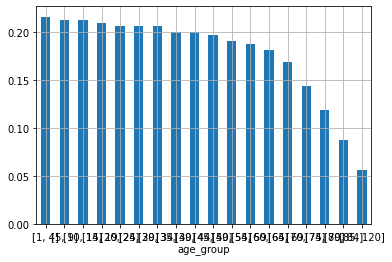

In [13]:
residual_life_expectancy_yearly_increace_by_age = residual_life_expectancy_diff.mean(axis=0)
residual_life_expectancy_yearly_increace_by_age.plot.bar(rot=0)

### conclusion: residual life expectancy increase yearly for all age groups. it's a little noisy, but consistent over the years

## life years lost due to degregation of one year

In [14]:
age_pyramid = pd.read_csv(path_data.joinpath('israel_2019_age_pyramid.csv'), index_col=0)
age_pyramid.index = text_interval_index_to_interval_index(age_pyramid.index, closed='both')
age_pyramid = age_pyramid.M + age_pyramid.F
age_pyramid = reduce_histogram_resolution(age_pyramid, residual_life_expectancy_yearly_increace_by_age.index)
age_pyramid.plot.bar(rot=0)

FileNotFoundError: [Errno 2] File ../data/united_kingdom/israel_2019_age_pyramid.csv does not exist: '../data/united_kingdom/israel_2019_age_pyramid.csv'

In [15]:
total_remaining_life_years_yearly_increace_by_age = residual_life_expectancy_yearly_increace_by_age * age_pyramid
total_remaining_life_years_yearly_increace_by_age.plot.bar(rot=0)

NameError: name 'age_pyramid' is not defined

In [16]:
total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age = total_remaining_life_years_yearly_increace_by_age / residual_life_expectancy.loc[2016, :]
total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age.plot.bar()

NameError: name 'total_remaining_life_years_yearly_increace_by_age' is not defined

In [17]:
residual_life_expectancy_yearly_increace_by_age.to_csv(path_results.joinpath('residual_life_expectancy_yearly_increace_by_age.csv'))
total_remaining_life_years_yearly_increace_by_age.to_csv(path_results.joinpath('total_remaining_life_years_yearly_increace_by_age.csv'))
total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age.to_csv(path_results.joinpath('total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age.csv'))

NameError: name 'total_remaining_life_years_yearly_increace_by_age' is not defined

In [18]:
#some pandas didn't work here nicely, dumped this cell \n
#yearly_increase_by_age_group = pd.concat(
#    [residual_life_expectancy_yearly_increace_by_age, total_remaining_life_years_yearly_increace_by_age, total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age],
#    axis=1
#)
#yearly_increase_by_age_group.columns = ['residual_life_expectancy', 'total_remaining_life_years_2016', 'total_remaining_life_years_life_equivalent_2016']
#yearly_increase_by_age_group.to_csv(path_results.joinpath('yearly_increase_by_age_group.csv'))
#yearly_increase_by_age_group

## health spending in UK over time

In [19]:
df_health_expenditure = pd.read_csv(path_data.joinpath('uk_health_spending_billions_gbp.csv'), index_col=0, usecols=[0, 2])


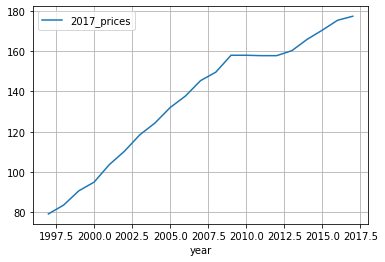

In [20]:
df_health_expenditure.plot()

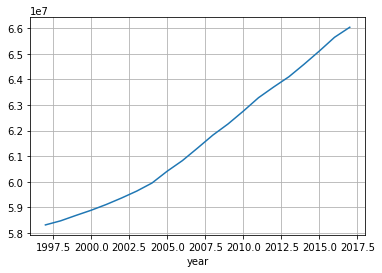

In [21]:
population = pd.read_csv(path_data.joinpath('uk_demographics_wikipedia.csv'), index_col=0, usecols=[0,1,], squeeze=True)
population = population.loc[df_health_expenditure.index]
population.plot()

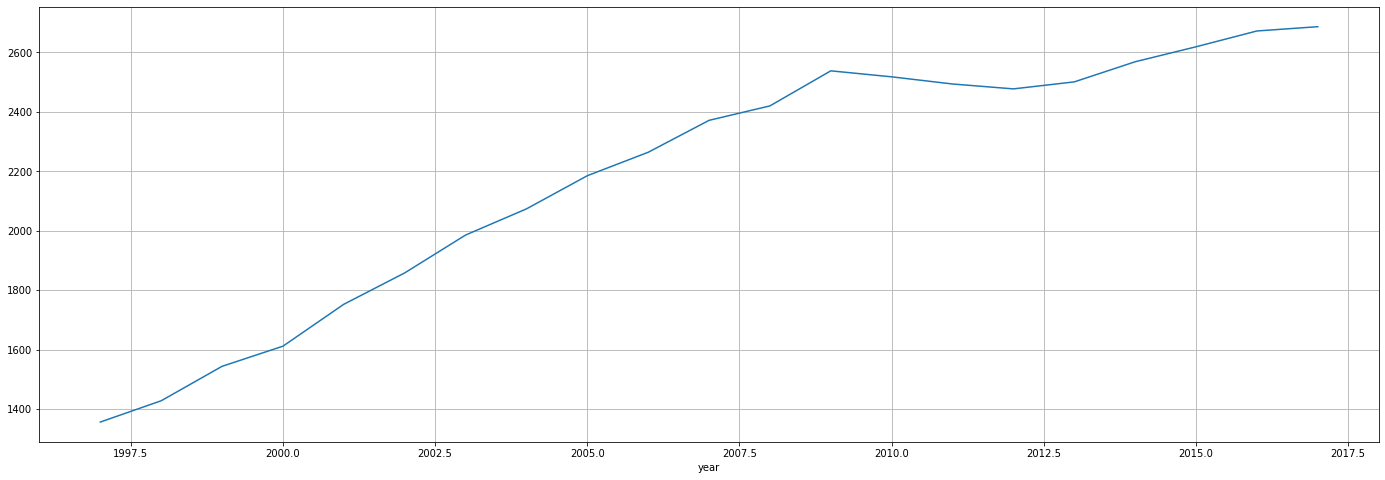

In [22]:
df_health_expenditure['gbp_per_capita'] = df_health_expenditure['2017_prices']  * 10 ** 9 / (population)
#df_health_expenditure.dropna()
df_health_expenditure['gbp_per_capita'].plot(grid=True, figsize=(24, 8))


In [23]:
pd.concat([df_health_expenditure['gbp_per_capita'], residual_life_expectancy.mean(axis=1)], axis=1).columns.names

FrozenList([None])

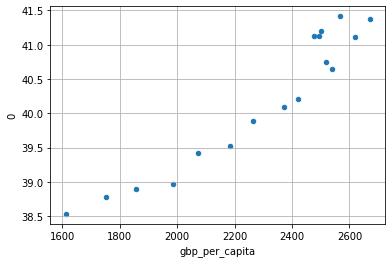

In [24]:
pd.concat([df_health_expenditure['gbp_per_capita'], residual_life_expectancy.mean(axis=1)], axis=1).plot.scatter(x='gbp_per_capita', y=0)

# This is the main part
# ===================================

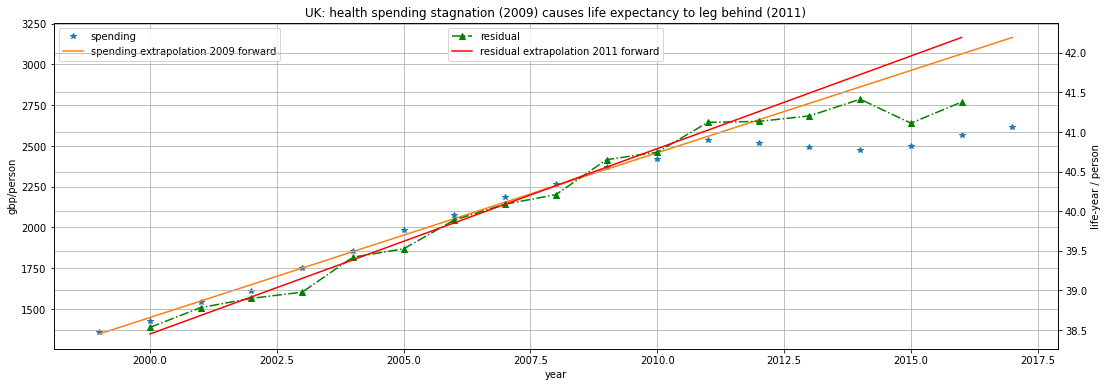

In [73]:
spending = df_health_expenditure['gbp_per_capita'].shift(2).dropna()
spending_early = spending.loc[:2011]
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(spending_early.index.values.reshape(-1, 1), spending_early.values.reshape(-1, 1))  # perform linear regression
#Y_pred = linear_regressor.predict(X)  # make predictions
ax = spending.plot(label='spending', linestyle=' ', marker="*")
ax.plot(spending.index, linear_regressor.predict(spending.index.values.reshape(-1, 1)), label='spending extrapolation 2009 forward')
ax.set_ylabel('gbp/person')

ax2 = ax.twinx()

res = residual_life_expectancy.mean(axis=1)
res_early = res.loc[:2011]

linear_regressor2 = LinearRegression()  # create object for the class
linear_regressor2.fit(res_early.index.values.reshape(-1, 1), res_early.values.reshape(-1, 1))  # perform linear regression
#Y_pred = linear_regressor.predict(X)  # make predictions
res.plot(ax=ax2, c='green', label='residual', linestyle='-.', marker='^')
ax2.plot(res.index, linear_regressor2.predict(res.index.values.reshape(-1, 1)), c='red', label='residual extrapolation 2011 forward')
#ax2.set_ylim((38.5, 41.5))
ax.legend(loc='best')
ax2.legend(loc='upper center')
ax2.set_ylabel('life-year / person')

ax.set_title('UK: health spending stagnation (2009) causes life expectancy to leg behind (2011)')

fig = ax.get_figure()
fig.savefig(path_results.joinpath('uk_spending_residual_extrapolation.jpeg'))

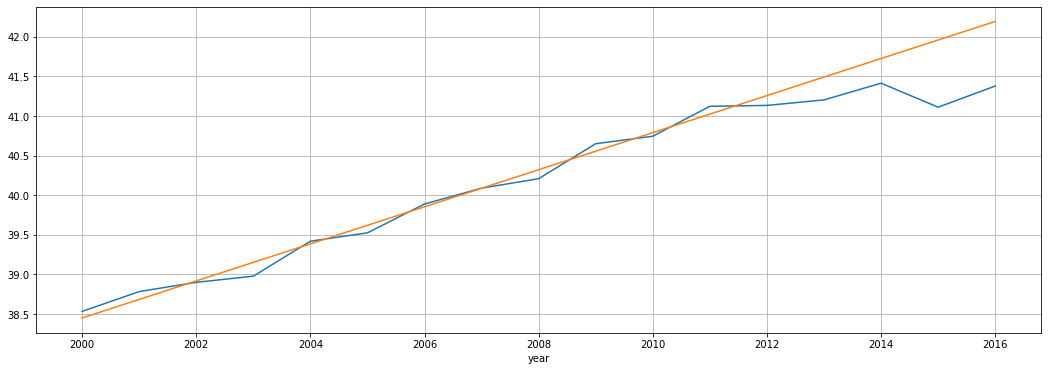

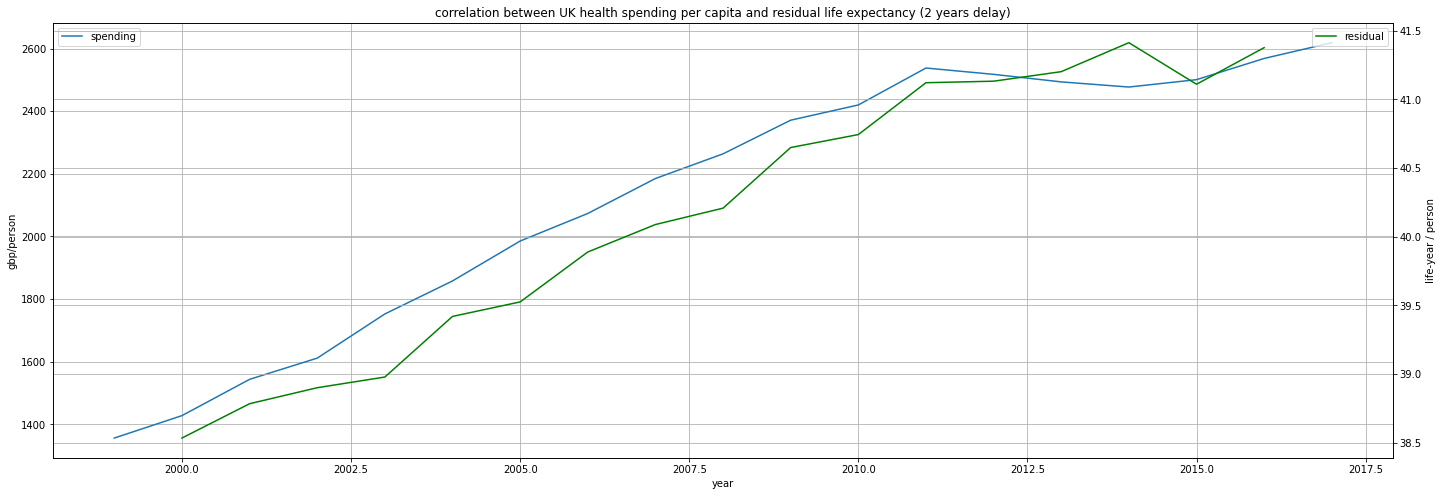

In [26]:
ax = df_health_expenditure['gbp_per_capita'].shift(2).plot(grid=True, figsize=(24, 8), label='spending')
ax.set_ylabel('gbp/person')
ax2 = ax.twinx()
ax.set_title('correlation between UK health spending per capita and residual life expectancy (2 years delay)')
(residual_life_expectancy.mean(axis=1).shift(0)).plot(ax=ax2, label='residual', color='green')
ax.legend(loc='best')
ax2.set_ylabel('life-year / person')
ax2.legend(loc='best')
fig = ax.get_figure()
fig.savefig(path_results.joinpath('uk_spending_residual.jpeg'))

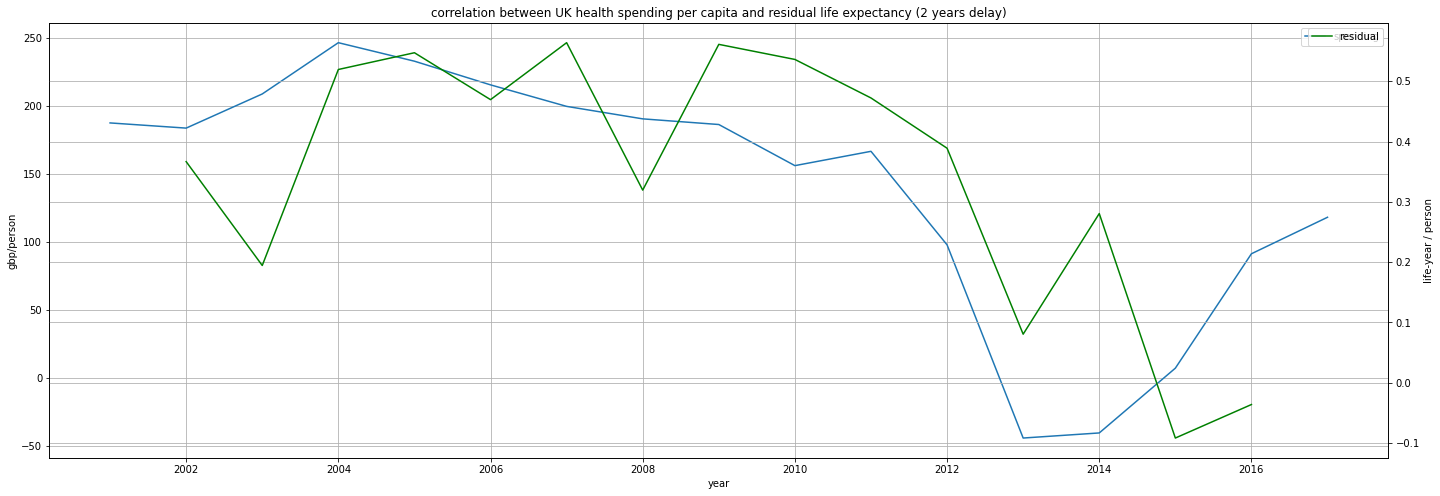

In [39]:
ax = df_health_expenditure['gbp_per_capita'].diff(periods=2).shift(2).plot(grid=True, figsize=(24, 8), label='spending')
ax.set_ylabel('gbp/person')
ax2 = ax.twinx()
ax.set_title('correlation between UK health spending per capita and residual life expectancy (2 years delay)')
(residual_life_expectancy.mean(axis=1).diff(periods=2).shift(0)).plot(ax=ax2, label='residual', color='green')
ax.legend(loc='best')
ax2.set_ylabel('life-year / person')
ax2.legend(loc='best')
fig = ax.get_figure()
#fig.savefig(path_results.joinpath('uk_spending_residual.jpeg'))

### difference between health expenditures per capita between adjecent years

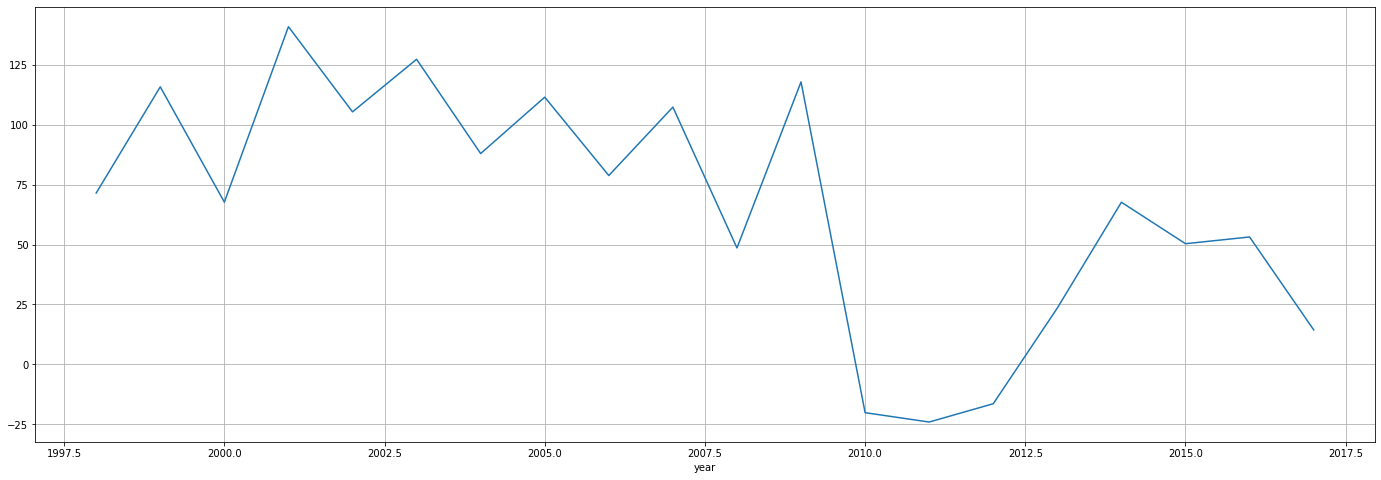

In [26]:
df_health_expenditure['gbp_per_capita'].diff().plot(grid=True, figsize=(24, 8))
#health_spending_per_capita_yearly_increase = df_health_expenditure.nis_per_capita.diff().median()


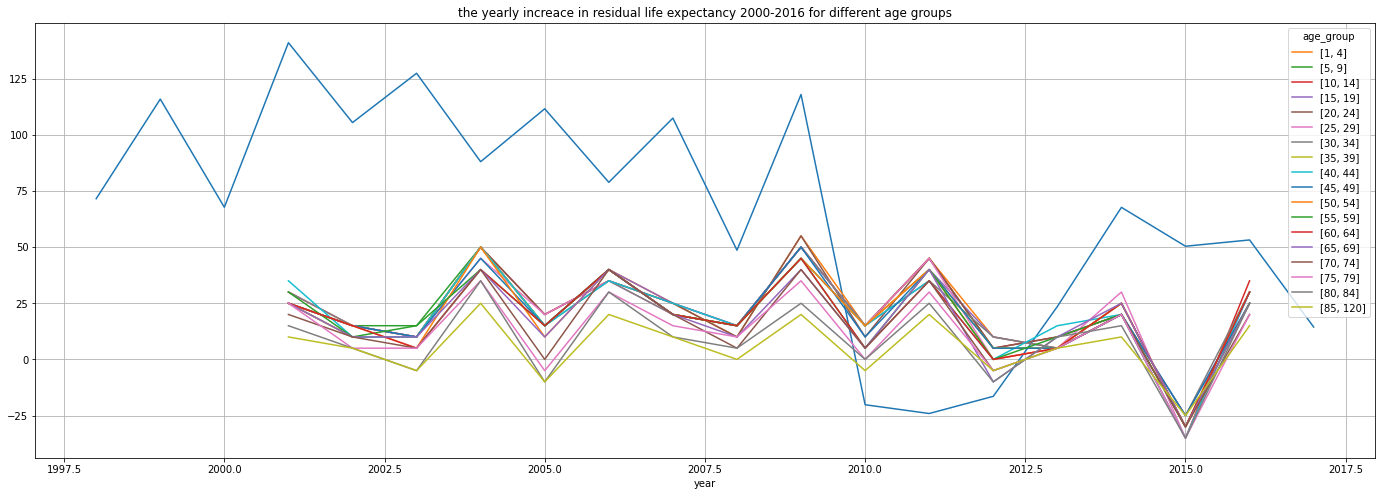

In [27]:
ax = df_health_expenditure['gbp_per_capita'].diff().plot(grid=True, figsize=(24, 8))
(100 * residual_life_expectancy_diff.rename(columns=lambda x:  str(x))).plot(grid=True, figsize=(24, 8), ax=ax, title='the yearly increace in residual life expectancy 2000-2016 for different age groups')


In [28]:
ax = df_health_expenditure.nis_per_capita.diff().plot.hist(grid=True, figsize=(24, 8))
ax.axvline(health_spending_per_capita_yearly_increase, color='red', label=f'median: {health_spending_per_capita_yearly_increase}', linewidth=6)
ax.legend(loc='best')

AttributeError: 'DataFrame' object has no attribute 'nis_per_capita'

### conclusion: 

In [29]:
print(f"every year the israeli health spending per capita increases ~{health_spending_per_capita_yearly_increase} NIS")

NameError: name 'health_spending_per_capita_yearly_increase' is not defined

In [24]:
dict_file = {'health_spending_per_capita_yearly_increase' : float(health_spending_per_capita_yearly_increase)}
with open(path_results.joinpath('health_spending_per_capita_yearly_increase.yaml'), 'w') as file:
    documents = yaml.dump(dict_file, file)